# Análisis Exploratorio

In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

# Configurar pandas para que muestre todas las filas
pd.set_option('display.max_rows', None)

#### Leemos los datos del CSV

In [5]:
data = pd.read_csv('movies.csv', encoding='ISO-8859-1')

1. Haga una exploración rápida de sus datos, para eso haga un resumen de su
conjunto de datos.

<small>Usamos `data.describe()` en Python para obtener un resumen estadístico rápido de los datos en un DataFrame de pandas. Este método proporciona información esencial como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada columna numérica. Esto nos ayuda a entender mejor la distribución y las características generales de los datos, identificar posibles valores atípicos y guiar el análisis exploratorio de datos.</small>

In [6]:
data.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


<small>El método `pd.info()` en pandas se utiliza para obtener un resumen conciso de un DataFrame. Proporciona información sobre:</small>

- <small>El número de filas y columnas.</small>
- <small>Los nombres de las columnas.</small>
- <small>El tipo de datos de cada columna.</small>
- <small>El número de valores no nulos en cada columna.</small>

<small>Esto es útil para entender rápidamente la estructura y las características básicas del conjunto de datos antes de realizar un análisis más profundo.</small>

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

<small>`isnull().sum()` nos sirve para saber la suma de cuántos valores son nulos para cada columna de nuestro dataset.</small>

In [8]:
print(data.isnull().sum())

id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64


<small>Ahora que ya sabemos cuántos datos faltan, sería mucho mejor saber cuánto porcentaje de ellos falta:</small>

In [22]:
# Porcentaje de datos faltantes por columna
missing_data = (data.isnull().sum() / len(data)) * 100
print(missing_data)

id                            0.00
budget                        0.00
genres                        0.53
homePage                     58.07
productionCompany             4.57
productionCompanyCountry     12.80
productionCountry             2.33
revenue                       0.00
runtime                       0.00
video                         4.86
director                      0.74
actors                        0.80
actorsPopularity              0.87
actorsCharacter               0.47
originalTitle                 0.00
title                         0.00
originalLanguage              0.00
popularity                    0.00
releaseDate                   0.00
voteAvg                       0.00
voteCount                     0.00
genresAmount                  0.00
productionCoAmount            0.00
productionCountriesAmount     0.00
actorsAmount                  0.00
castWomenAmount               0.00
castMenAmount                 0.00
dtype: float64


<small>Ahora veamos cuántos datos están duplicados:</small>

In [25]:
print("La cantidad de valores duplicados es:", data.duplicated().sum())

La cantidad de valores duplicados es: 0


#### ¿Cuál es el propósito de hacer histogramas?
<small>  Los histogramas son útiles para visualizar la distribución de datos numéricos. Permiten identificar rápidamente la forma de la distribución (normal, sesgada, bimodal, etc.), la presencia de valores atípicos y cómo están agrupados los valores. Este código genera histogramas de todas las variables numéricas en el conjunto de datos, ajustando el tamaño de la figura para una visualización clara.</small>

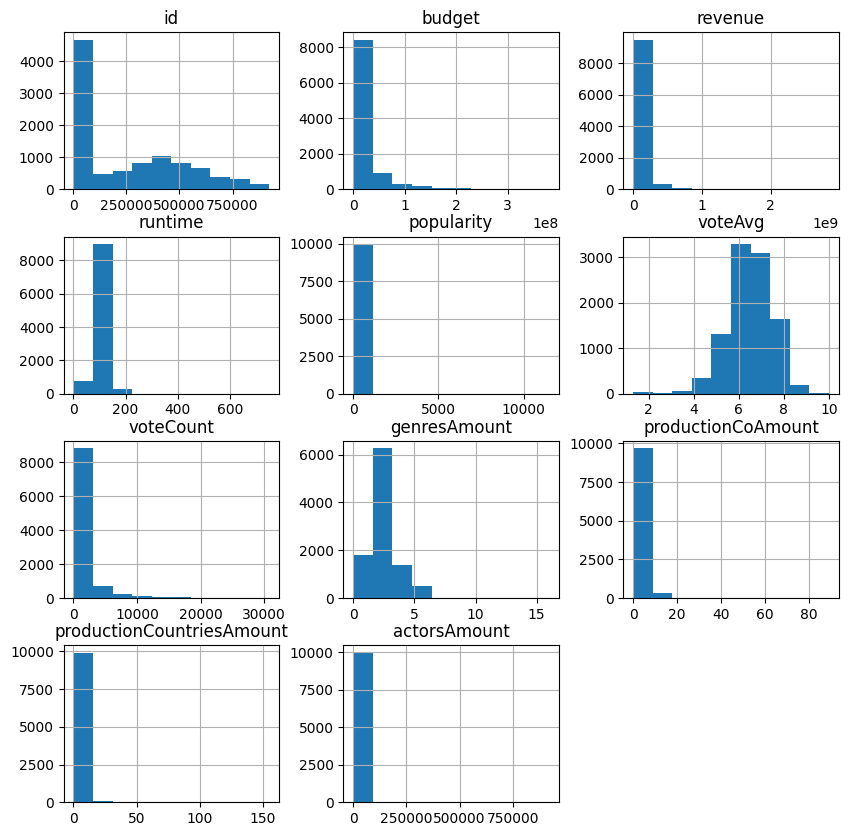

In [10]:
data.hist(figsize=(10, 10))
plt.show()

#### ¿Cuál es el propósito de hacer box plots?
<small>Los gráficos de caja muestran la distribución de datos numéricos y son especialmente buenos para identificar valores atípicos y entender la dispersión de los datos (mediante cuartiles y medianas). Este código crea un gráfico de caja para cada variable numérica, organizándolos en una matriz de gráficos para facilitar la comparación.</small>

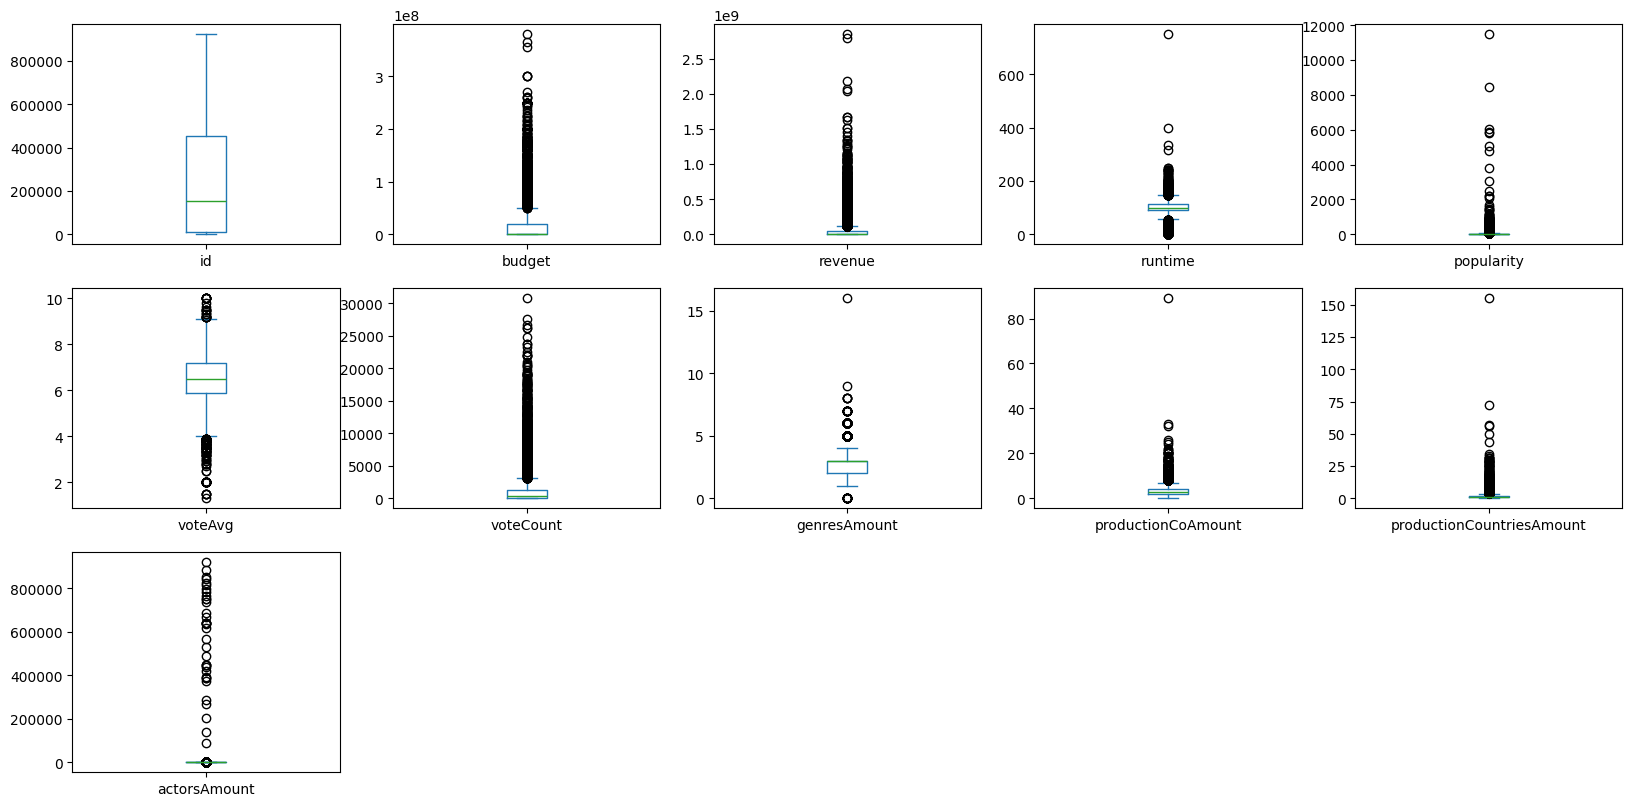

In [26]:
data.plot(kind='box', subplots=True, layout=(6,5), figsize=(20, 20))
plt.show()

#### ¿Cuál es el propósito de hacer una matriz de correlación?

<small>La matriz de correlación es una herramienta para identificar y visualizar correlaciones entre variables numéricas. Los valores de correlación pueden indicar la fuerza y la dirección de la relación lineal entre pares de variables. Este código calcula y muestra la matriz de correlación, ayudando a identificar variables que están potencialmente relacionadas entre sí.</small>

In [14]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

                                 id    budget   revenue   runtime  popularity  \
id                         1.000000 -0.244895 -0.187939 -0.197387    0.124959   
budget                    -0.244895  1.000000  0.757454  0.281498    0.160191   
revenue                   -0.187939  0.757454  1.000000  0.248655    0.162546   
runtime                   -0.197387  0.281498  0.248655  1.000000    0.032538   
popularity                 0.124959  0.160191  0.162546  0.032538    1.000000   
voteAvg                   -0.017273  0.044371  0.141262  0.220476    0.066436   
voteCount                 -0.223304  0.630257  0.768255  0.282363    0.107669   
genresAmount              -0.163753  0.198347  0.136228  0.029798    0.039169   
productionCoAmount        -0.030219  0.130134  0.058799  0.159282    0.005712   
productionCountriesAmount  0.056948 -0.036670 -0.038485  0.015323   -0.007466   
actorsAmount               0.089513 -0.026730 -0.019555 -0.091217   -0.006230   

                           

#### ¿Cuál es el propósito de hacer un mapa de calor de la matriz de correlación?

<small>Los mapas de calor permiten visualizar la matriz de correlación de manera más intuitiva, usando colores para representar los valores de correlación, facilitando la identificación de relaciones fuertes. Este código crea un mapa de calor con anotaciones que muestran los valores exactos de correlación, haciendo la matriz más accesible y fácil de interpretar.</small>

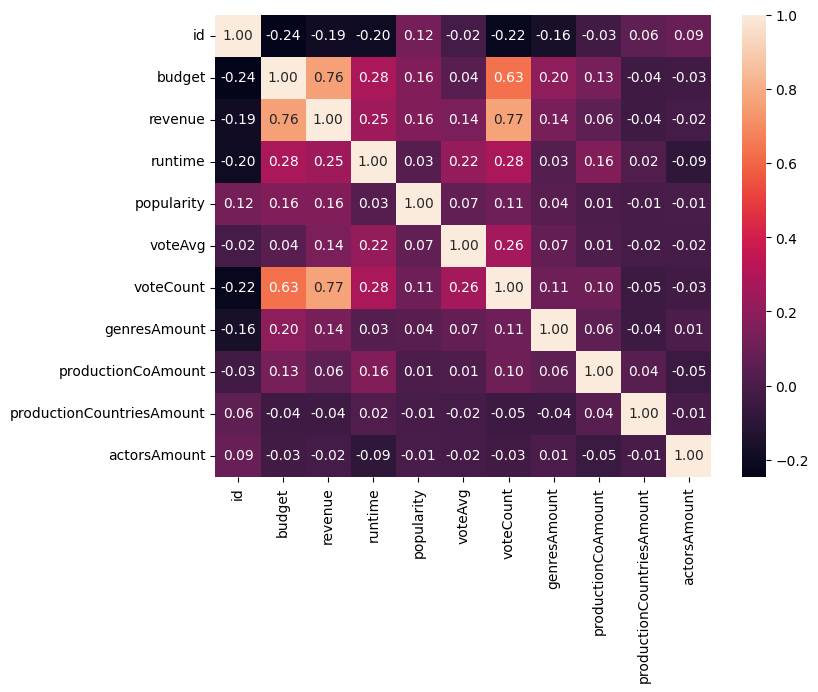

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()